### Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### importing data set

In [4]:
avacado=pd.read_csv("D:/DataScience/Class/assignment working/MLR/Avacado_Price.csv")

In [5]:
avacado.columns=avacado.columns.str.replace(" ","_")

### EDA

In [5]:
avacado.head(10)

AveragePrice  Total_Volume  tot_ava1   tot_ava2  tot_ava3  Total_Bags  \
0          1.33      64236.62   1036.74   54454.85     48.16     8696.87   
1          1.35      54876.98    674.28   44638.81     58.33     9505.56   
2          0.93     118220.22    794.70  109149.67    130.50     8145.35   
3          1.08      78992.15   1132.00   71976.41     72.58     5811.16   
4          1.28      51039.60    941.48   43838.39     75.78     6183.95   
5          1.26      55979.78   1184.27   48067.99     43.61     6683.91   
6          0.99      83453.76   1368.92   73672.72     93.26     8318.86   
7          0.98     109428.33    703.75  101815.36     80.00     6829.22   
8          1.02      99811.42   1022.15   87315.57     85.34    11388.36   
9          1.07      74338.76    842.40   64757.44    113.00     8625.92   

   Small_Bags  Large_Bags  XLarge_Bags          type  year  region  
0     8603.62       93.25          0.0  conventional  2015  Albany  
1     9408.07       97.49          0.0  conventional  2015  Albany  
2     8042.21      103.14          0.0  conventional  2015  Albany  
3     5677.40      133.76          0.0  conventional  2015  Albany  
4     5986.26      197.69          0.0  conventional  2015  Albany  
5     6556.47      127.44          0.0  conventional  2015  Albany  
6     8196.81      122.05          0.0  conventional  2015  Albany  
7     6266.85      562.37          0.0  conventional  2015  Albany  
8    11104.53      283.83          0.0  conventional  2015  Albany  
9     8061.47      564.45          0.0  conventional  2015  Albany

In [6]:
avacado.shape

(18249, 12)

In [7]:
avacado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   tot_ava1      18249 non-null  float64
 3   tot_ava2      18249 non-null  float64
 4   tot_ava3      18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   XLarge_Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


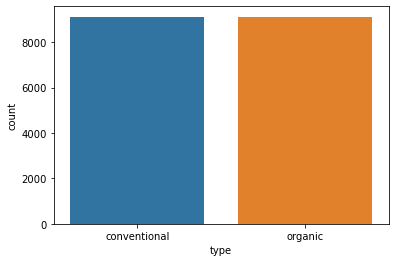

In [8]:
sns.countplot(x=avacado.type)
plt.show()

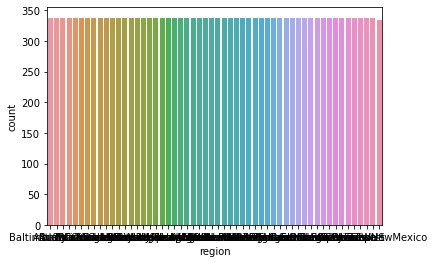

In [9]:
sns.countplot(x=avacado.region)
plt.show()

In [10]:
#checking categories inside "region" feature
avacado.region.value_counts()

Houston                338
SanFrancisco           338
Plains                 338
SouthCarolina          338
CincinnatiDayton       338
Southeast              338
NewOrleansMobile       338
Seattle                338
Atlanta                338
Syracuse               338
Jacksonville           338
Orlando                338
RaleighGreensboro      338
PhoenixTucson          338
NorthernNewEngland     338
Albany                 338
HartfordSpringfield    338
BaltimoreWashington    338
SouthCentral           338
Spokane                338
NewYork                338
Philadelphia           338
MiamiFtLauderdale      338
DallasFtWorth          338
Chicago                338
Pittsburgh             338
LasVegas               338
Denver                 338
Indianapolis           338
Roanoke                338
SanDiego               338
West                   338
RichmondNorfolk        338
Nashville              338
Portland               338
StLouis                338
GrandRapids            338
B

## Type casting

In [11]:
#changing "type" and "region" colum from categorical to numeric


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lab=LabelEncoder()

In [14]:
avacado.region =lab.fit_transform(avacado.region)

In [15]:
avacado.type = lab.fit_transform(avacado.type)

In [16]:
#checking null value

In [17]:
avacado.isna().sum()

AveragePrice    0
Total_Volume    0
tot_ava1        0
tot_ava2        0
tot_ava3        0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
dtype: int64

In [18]:
#checking outliers

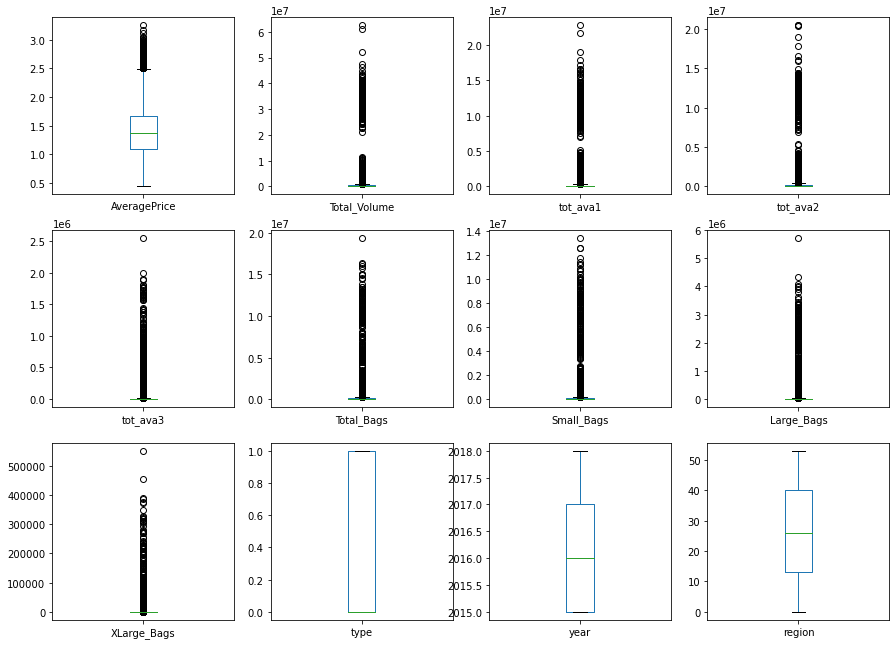

In [19]:
avacado.plot(kind="box",figsize=(15,15),subplots=True,layout=(4,4))
plt.show()

In [20]:
#winsorizing outliers
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method="iqr",fold=1.5,tail="both")
avacado=win.fit_transform(avacado)

In [21]:
#checking winsorized data
avacado.plot(kind="box",figsize=(15,15),subplots=True,layout=(4,4))
plt.show()

In [22]:
avacado.describe()

AveragePrice  Total_Volume       tot_ava1       tot_ava2      tot_ava3  \
count  18249.000000  1.824900e+04   18249.000000   18249.000000  18249.000000   
mean       1.403668  2.889859e+05   69525.206350   98713.852159   3921.430544   
std        0.395427  3.701947e+05   99244.901205  133134.946501   5995.411078   
min        0.440000  8.456000e+01       0.000000       0.000000      0.000000   
25%        1.100000  1.083858e+04     854.070000    3008.780000      0.000000   
50%        1.370000  1.073768e+05    8645.300000   29061.020000    184.990000   
75%        1.660000  4.329623e+05  111020.200000  150206.860000   6243.420000   
max        2.500000  1.066148e+06  276269.395000  371003.980000  15608.550000   

          Total_Bags     Small_Bags    Large_Bags   XLarge_Bags          type  \
count   18249.000000   18249.000000  18249.000000  18249.000000  18249.000000   
mean    77943.663114   57475.744762  14324.312070     82.932110      0.499918   
std     93026.265810   69703.476607  20224.173615    138.106393      0.500014   
min         0.000000       0.000000      0.000000      0.000000      0.000000   
25%      5088.640000    2849.420000    127.470000      0.000000      0.000000   
50%     39743.830000   26362.820000   2647.710000      0.000000      0.000000   
75%    110783.370000   83337.670000  22029.250000    132.500000      1.000000   
max    269325.465000  204070.045000  54881.920000    331.250000      1.000000   

               year        region  
count  18249.000000  18249.000000  
mean    2016.147899     26.495644  
std        0.939938     15.583788  
min     2015.000000      0.000000  
25%     2015.000000     13.000000  
50%     2016.000000     26.000000  
75%     2017.000000     40.000000  
max     2018.000000     53.000000

In [23]:
#checking correlation
avacado.corr()

AveragePrice  Total_Volume  tot_ava1  tot_ava2  tot_ava3  \
AveragePrice      1.000000     -0.508013 -0.529095 -0.416055 -0.470443   
Total_Volume     -0.508013      1.000000  0.862914  0.918696  0.735324   
tot_ava1         -0.529095      0.862914  1.000000  0.679998  0.646679   
tot_ava2         -0.416055      0.918696  0.679998  1.000000  0.716079   
tot_ava3         -0.470443      0.735324  0.646679  0.716079  1.000000   
Total_Bags       -0.490911      0.926100  0.791529  0.809947  0.663865   
Small_Bags       -0.452942      0.911307  0.759106  0.827511  0.677017   
Large_Bags       -0.428966      0.706783  0.677472  0.561624  0.435210   
XLarge_Bags      -0.355443      0.584318  0.536757  0.553875  0.559618   
type              0.621292     -0.655466 -0.627013 -0.627230 -0.610211   
year              0.091885      0.038736  0.017481 -0.007602 -0.083827   
region           -0.015144      0.106552  0.172991  0.049120  0.038485   

              Total_Bags  Small_Bags  Large_Bags  XLarge_Bags      type  \
AveragePrice   -0.490911   -0.452942   -0.428966    -0.355443  0.621292   
Total_Volume    0.926100    0.911307    0.706783     0.584318 -0.655466   
tot_ava1        0.791529    0.759106    0.677472     0.536757 -0.627013   
tot_ava2        0.809947    0.827511    0.561624     0.553875 -0.627230   
tot_ava3        0.663865    0.677017    0.435210     0.559618 -0.610211   
Total_Bags      1.000000    0.961362    0.775343     0.599925 -0.623950   
Small_Bags      0.961362    1.000000    0.632182     0.600454 -0.620843   
Large_Bags      0.775343    0.632182    1.000000     0.429142 -0.464445   
XLarge_Bags     0.599925    0.600454    0.429142     1.000000 -0.592029   
type           -0.623950   -0.620843   -0.464445    -0.592029  1.000000   
year            0.146330    0.128440    0.144863     0.163137 -0.000032   
region          0.117088    0.112723    0.153494     0.005992 -0.000280   

                  year    region  
AveragePrice  0.091885 -0.015144  
Total_Volume  0.038736  0.106552  
tot_ava1      0.017481  0.172991  
tot_ava2     -0.007602  0.049120  
tot_ava3     -0.083827  0.038485  
Total_Bags    0.146330  0.117088  
Small_Bags    0.128440  0.112723  
Large_Bags    0.144863  0.153494  
XLarge_Bags   0.163137  0.005992  
type         -0.000032 -0.000280  
year          1.000000 -0.000055  
region       -0.000055  1.000000

### Bar Plot

In [ ]:
avacado.plot(kind="bar",figsize=(30,30),subplots=True,layout=(4,4))
plt.show()

### Histogram

In [23]:
avacado.plot(kind="hist",figsize=(30,30),subplots=True,layout=(4,4))
plt.show()

### Probability plot

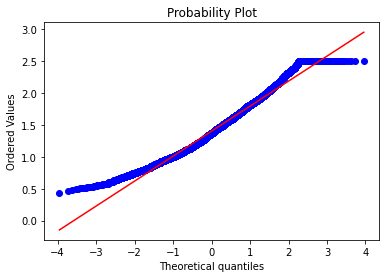

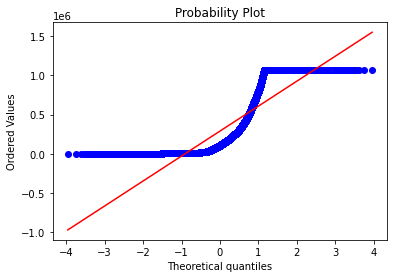

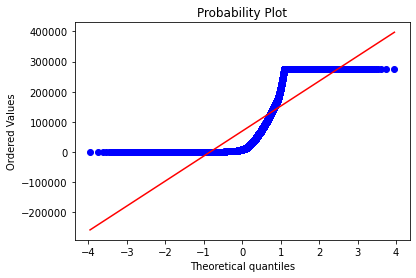

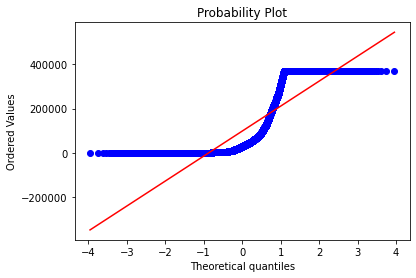

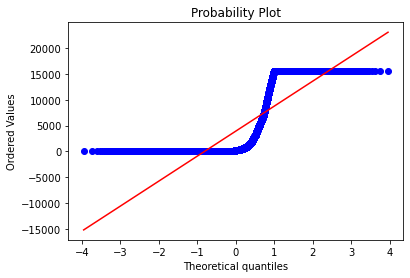

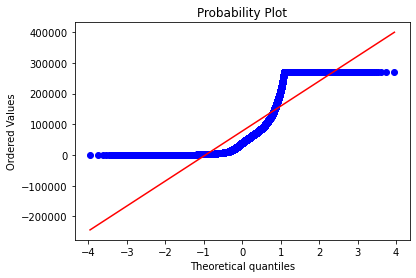

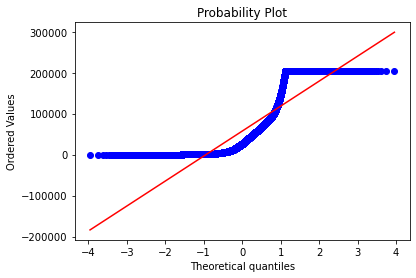

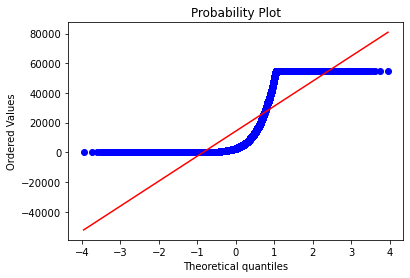

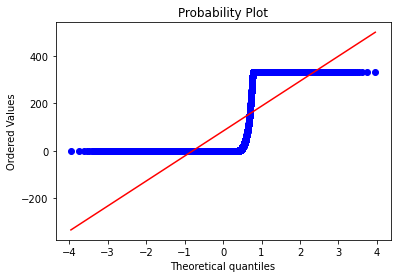

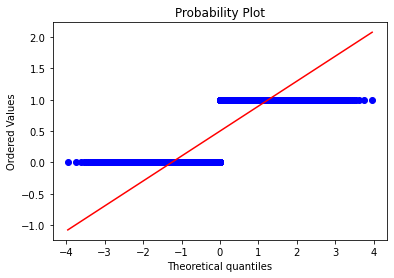

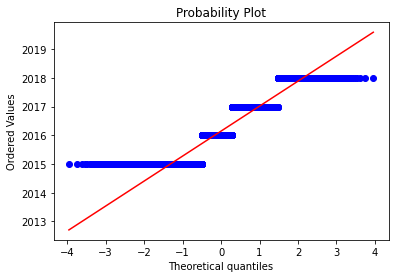

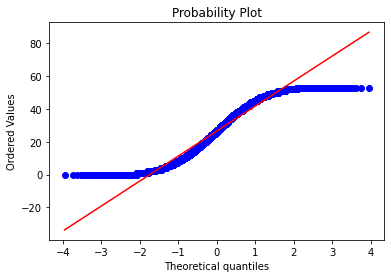

In [25]:
from scipy import stats
for i in avacado.columns:
    stats.probplot(avacado[i], dist = "norm", plot = plt)
    plt.show()

### Pairplot for correlation

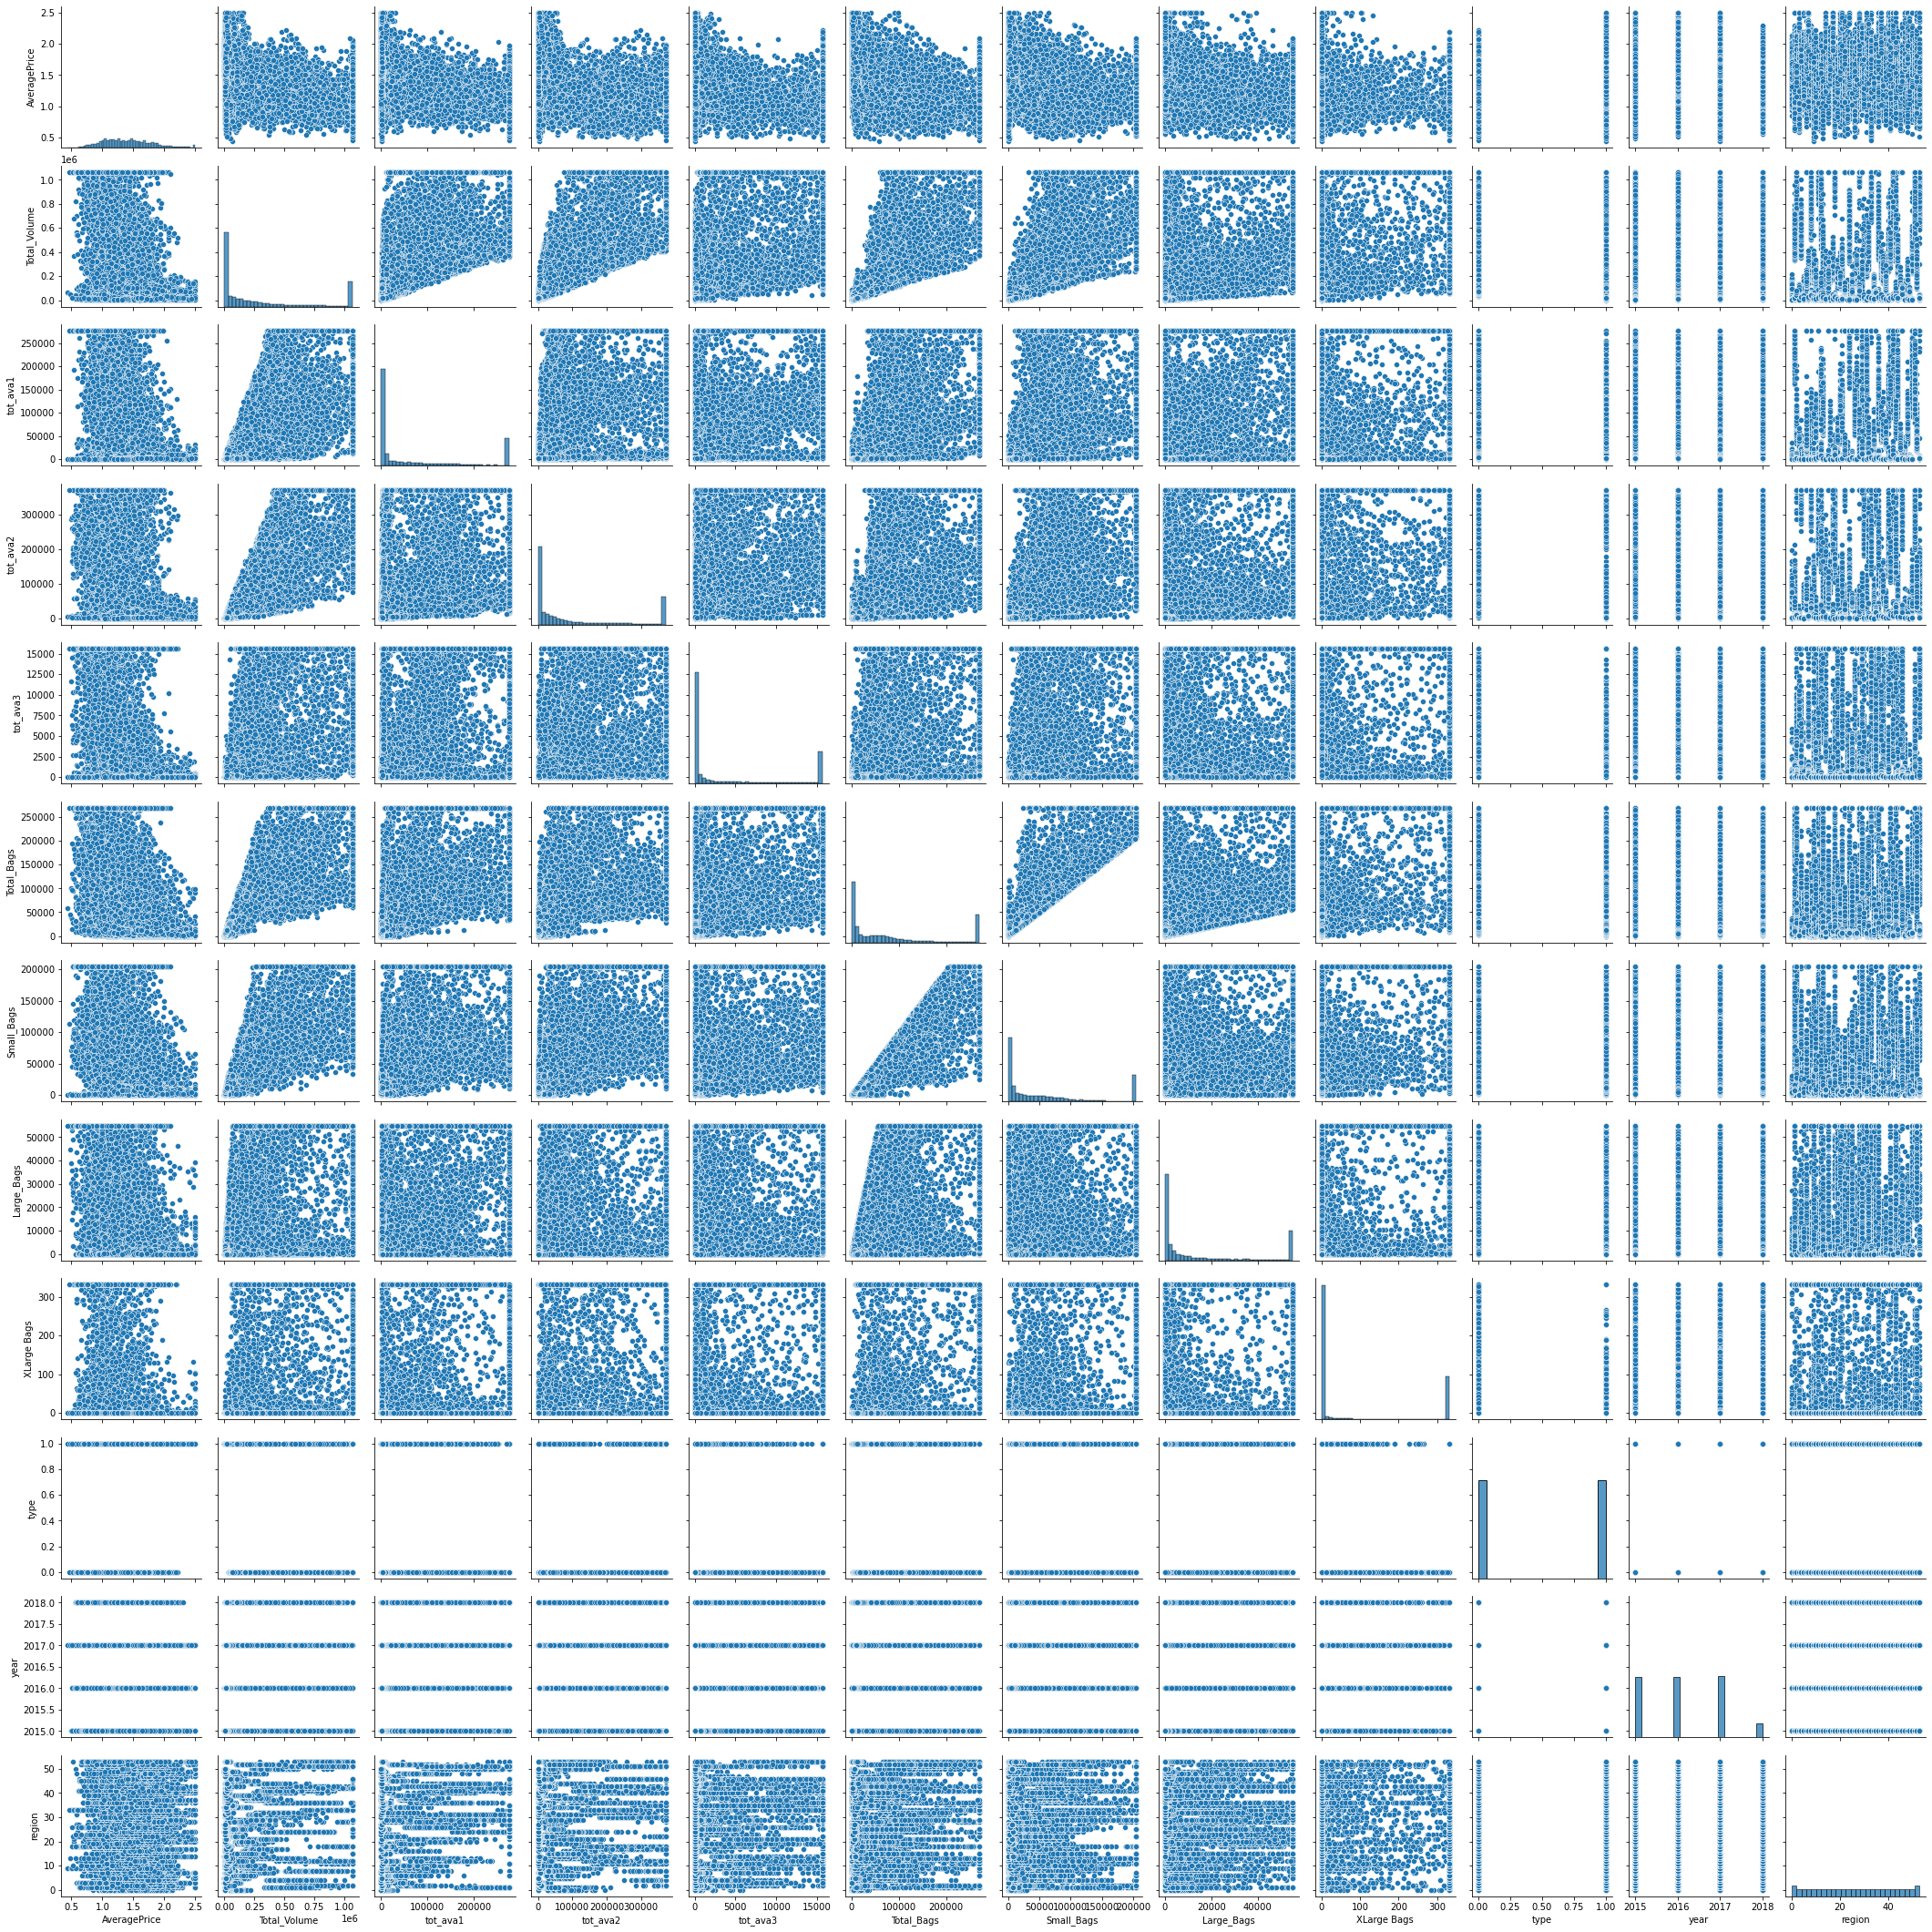

In [26]:
sns.pairplot(avacado)
plt.show()

### Building Linear Regression model

In [6]:
import statsmodels.formula.api as smf

In [9]:
ml1=smf.ols('AveragePrice ~ Total_Volume +tot_ava1 + tot_ava2 + tot_ava3 + Total_Bags + Small_Bags + Large_Bags + XLarge_Bags + type + year + region',data=avacado).fit()

In [66]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     1401.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:41:09   Log-Likelihood:                -3373.4
No. Observations:               18249   AIC:                             6771.
Df Residuals:                   18237   BIC:                             6865.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -86.7730      4.996    -17.368      0.000     -96.566     -76.980
Total_Volume -3.551e-07   3.67e-08     -9.670      0.000   -4.27e-07   -2.83e-07
tot_ava1     -2.374e-07    5.8e-08     -4.094      0.000   -3.51e-07   -1.24e-07
tot_ava2      1.005e-06   5.67e-08     17.717      0.000    8.94e-07    1.12e-06
tot_ava3     -7.397e-06   5.78e-07    -12.794      0.000   -8.53e-06   -6.26e-06
Total_Bags   -1.162e-06   1.46e-07     -7.938      0.000   -1.45e-06   -8.75e-07
Small_Bags    1.372e-06   1.55e-07      8.874      0.000    1.07e-06    1.68e-06
Large_Bags   -9.721e-07   2.31e-07     -4.209      0.000   -1.42e-06   -5.19e-07
XLarge_Bags      0.0002   2.18e-05      9.147      0.000       0.000       0.000
type             0.4015      0.006     62.820      0.000       0.389       0.414
year             0.0437      0.002     17.614      0.000       0.039       0.049
region           0.0008      0.000      5.369      0.000       0.000       0.001
==============================================================================
Omnibus:                      346.556   Durbin-Watson:                   0.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.797
Skew:                           0.252   Prob(JB):                     4.75e-99
Kurtosis:                       3.585   Cond. No.                     1.22e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
pred1 = ml1.predict(avacado)

In [35]:
rmse1=np.sqrt(np.mean((avacado.AveragePrice - pred1)**2))
rmse1

0.29110126775267225

In [36]:
rsq1 = smf.ols('AveragePrice ~ Total_Volume +tot_ava1 + tot_ava2 + tot_ava3 + Total_Bags + Small_Bags + Large_Bags + XLarge_Bags + type + year + region',data=avacado).fit().rsquared

In [37]:
# checking influencial indexes

In [27]:
import statsmodels.api as sm

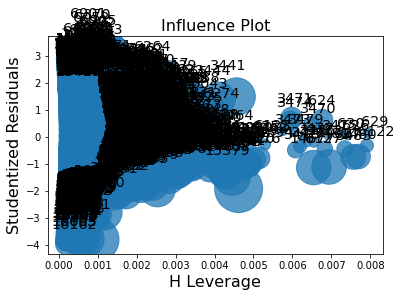

In [28]:
sm.graphics.influence_plot(ml1)
plt.show()

In [29]:
plt.figure(figsize=(10,10))
sm.graphics.plot_partregress_grid(ml1)
plt.show()

C:\Users\theas\anaconda3\lib\site-packages\statsmodels\graphics\regressionplots.py:561: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


<Figure size 720x720 with 0 Axes>

In [39]:
#Calculating VIF(Variance Inflation Factor)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=avacado[[ 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type',
       'year', 'region']]
vif_data = pd.DataFrame()
vif_data["Feature"]=X.columns

In [51]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i ) for i in range(len(X.columns))]
print(vif_data)

         feature        VIF
0   Total_Volume  63.931004
1       tot_ava1  10.603659
2       tot_ava2  18.986902
3       tot_ava3   3.590327
4     Total_Bags  67.653892
5     Small_Bags  41.916418
6     Large_Bags   7.031512
7    XLarge_Bags   2.556338
8           type   4.380022
9           year   9.376904
10        region   4.187320


In [ ]:
checking VIF without Total bags

In [52]:
#as we can see there are features with vary high VIF and those should be treated 

In [ ]:
#trying new model by removing "Total_Bag"

In [53]:
ml2 = smf.ols('AveragePrice ~ Total_Volume +tot_ava1 + tot_ava2 + tot_ava3  + Small_Bags + Large_Bags + XLarge_Bags + type + year + region',data=avacado).fit()

In [54]:
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     1530.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:25:50   Log-Likelihood:                -3404.9
No. Observations:               18249   AIC:                             6832.
Df Residuals:                   18238   BIC:                             6918.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -84.4264      4.996    -16.899      0.000     -94.219     -74.634
Total_Volume -4.551e-07   3.46e-08    -13.169      0.000   -5.23e-07   -3.87e-07
tot_ava1     -1.374e-07   5.67e-08     -2.424      0.015   -2.49e-07   -2.63e-08
tot_ava2      1.132e-06   5.46e-08     20.739      0.000    1.02e-06    1.24e-06
tot_ava3     -7.542e-06   5.79e-07    -13.029      0.000   -8.68e-06   -6.41e-06
Small_Bags     3.28e-07   8.14e-08      4.030      0.000    1.68e-07    4.88e-07
Large_Bags   -2.268e-06   1.64e-07    -13.861      0.000   -2.59e-06   -1.95e-06
XLarge_Bags      0.0002   2.18e-05      8.628      0.000       0.000       0.000
type             0.4037      0.006     63.121      0.000       0.391       0.416
year             0.0425      0.002     17.145      0.000       0.038       0.047
region           0.0008      0.000      5.824      0.000       0.001       0.001
==============================================================================
Omnibus:                      346.565   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.306
Skew:                           0.256   Prob(JB):                     1.22e-97
Kurtosis:                       3.570   Cond. No.                     1.19e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
#removing Total bag dosent help
#checking vif without "Total bag"
X=avacado[[ 'Total_Volume','tot_ava1', 'tot_ava2', 'tot_ava3',
        'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type',
       'year', 'region']]
vif_data = pd.DataFrame()
vif_data["Feature"]=X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i ) for i in range(len(X.columns))]
print(vif_data)


        Feature        VIF
0  Total_Volume  56.469311
1      tot_ava1  10.087498
2      tot_ava2  17.454999
3      tot_ava3   3.588577
4    Small_Bags  11.204251
5    Large_Bags   3.467665
6   XLarge_Bags   2.540647
7          type   4.372811
8          year   9.332486
9        region   4.172800


In [55]:
#trying with removing Total_Volume


In [56]:
ml3 = smf.ols('AveragePrice ~ tot_ava1 + tot_ava2 + tot_ava3  + Total_Bags + Small_Bags + Large_Bags + XLarge_Bags + type + year + region',data=avacado).fit()

In [57]:
ml3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     1524.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:30:39   Log-Likelihood:                -3420.1
No. Observations:               18249   AIC:                             6862.
Df Residuals:                   18238   BIC:                             6948.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -88.4542      5.006    -17.670      0.000     -98.266     -78.642
tot_ava1    -6.481e-07   3.96e-08    -16.366      0.000   -7.26e-07    -5.7e-07
tot_ava2      5.52e-07   3.21e-08     17.221      0.000    4.89e-07    6.15e-07
tot_ava3    -7.794e-06   5.78e-07    -13.479      0.000   -8.93e-06   -6.66e-06
Total_Bags  -1.647e-06   1.38e-07    -11.949      0.000   -1.92e-06   -1.38e-06
Small_Bags   1.387e-06   1.55e-07      8.947      0.000    1.08e-06    1.69e-06
Large_Bags  -9.584e-07   2.32e-07     -4.140      0.000   -1.41e-06   -5.05e-07
XLarge_Bags     0.0002   2.16e-05     10.449      0.000       0.000       0.000
type            0.3937      0.006     61.940      0.000       0.381       0.406
year            0.0445      0.002     17.918      0.000       0.040       0.049
region          0.0008      0.000      5.901      0.000       0.001       0.001
==============================================================================
Omnibus:                      318.205   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              409.502
Skew:                           0.241   Prob(JB):                     1.20e-89
Kurtosis:                       3.553   Cond. No.                     5.63e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
#still r2 is not much effected 

In [60]:
#checking vif
X=avacado[[ 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type',
       'year', 'region']]
vif_data = pd.DataFrame()
vif_data["Feature"]=X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i ) for i in range(len(X.columns))]
print(vif_data)

       Feature        VIF
0     tot_ava1   4.872254
1     tot_ava2   5.927203
2     tot_ava3   3.568579
3   Total_Bags  59.757683
4   Small_Bags  41.910951
5   Large_Bags   7.031080
6  XLarge_Bags   2.508146
7         type   4.312648
8         year   9.212059
9       region   4.174710


In [61]:
#Vif without "Total_Bag"and "Total_Volume and "


In [71]:
#checking vif
X=avacado[[ 'tot_ava1', 'tot_ava2', 'tot_ava3',
        'Total_Bags','Large_Bags', 'XLarge_Bags', 'type',
       'year', 'region']]
vif_data = pd.DataFrame()
vif_data["Feature"]=X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i ) for i in range(len(X.columns))]
print(vif_data)

       Feature        VIF
0     tot_ava1   4.842354
1     tot_ava2   5.623119
2     tot_ava3   3.566658
3   Total_Bags  10.632148
4   Large_Bags   4.156008
5  XLarge_Bags   2.502863
6         type   4.312433
7         year   9.212031
8       region   4.134930


In [72]:
#now lets build the final model


In [73]:
ml4 = smf.ols('AveragePrice ~ tot_ava1 + tot_ava2 + tot_ava3 + Total_Bags + Large_Bags + XLarge_Bags + type + year + region',data=avacado).fit()

In [74]:
ml4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     1677.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:50:23   Log-Likelihood:                -3460.0
No. Observations:               18249   AIC:                             6940.
Df Residuals:                   18239   BIC:                             7018.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -90.5552      5.011    -18.071      0.000    -100.378     -80.733
tot_ava1    -6.187e-07   3.95e-08    -15.645      0.000   -6.96e-07   -5.41e-07
tot_ava2     6.181e-07   3.13e-08     19.775      0.000    5.57e-07    6.79e-07
tot_ava3    -7.871e-06   5.79e-07    -13.585      0.000   -9.01e-06   -6.74e-06
Total_Bags  -5.345e-07   5.96e-08     -8.970      0.000   -6.51e-07   -4.18e-07
Large_Bags  -2.285e-06   1.78e-07    -12.820      0.000   -2.63e-06   -1.94e-06
XLarge_Bags     0.0002   2.17e-05     10.755      0.000       0.000       0.000
type            0.3932      0.006     61.724      0.000       0.381       0.406
year            0.0455      0.002     18.318      0.000       0.041       0.050
region          0.0010      0.000      6.801      0.000       0.001       0.001
==============================================================================
Omnibus:                      294.098   Durbin-Watson:                   0.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              369.494
Skew:                           0.235   Prob(JB):                     5.83e-81
Kurtosis:                       3.514   Cond. No.                     5.26e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Summary and inference

From above results we can say that the independent variables are not enough to predict dependent variable